In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [135]:
# Таблица содержит историю транзакций клиентов за 1 год и 3 месяца
# customer_id - идентификатор клиента 
# tr_datetime - день и время транзкации
# mcc_code    - mcc_code транзакции
# tr_type     - тип транзакции
# amount      - сумма + зачисление клиенту - списание у клиента 
# term_id     - идентификатор терминала

transactions = pd.read_csv(filepath_or_buffer = "../../source/transactions.csv", 
                           sep =',',
                           nrows=1000000)
#transactions

In [136]:
# Таблица содержит информацию по полу части клиентов, для которых он известен, для остальных он не известен
# customer_id - идентификатор клиента 
# tgender     - пол

gender_train = pd.read_csv(filepath_or_buffer = "../../source/gender_train.csv", 
            sep =',')
#gender_train

In [137]:
# Таблица содержит описание mcc_code транзакций
# mcc_code        - mcc_code транзакции 
# mcc_description - описание 

tr_mcc_codes = pd.read_csv(filepath_or_buffer = "../../source/tr_mcc_codes.csv", 
            sep =';')

In [138]:
# Таблица содержит описание типов транзакций
# tr_type        - тип транзакции 
# tr_description - описание 

tr_types = pd.read_csv(filepath_or_buffer = "../../source/tr_types.csv", 
            sep =';')

### Task 0

In [139]:
# Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). 
#Причём с gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
#После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить.
#В результате соединения датафреймов должно получиться 999584 строки.

In [140]:
result_1 = pd.merge(transactions, tr_mcc_codes)
result_2 = pd.merge(result_1, tr_types)
result = pd.merge (result_2, gender_train, how='left')
result

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN


In [141]:
# второй вариант
transactions = pd.merge(transactions, gender_train, how='left')
transactions = pd.merge(transactions, tr_mcc_codes, how='inner')
transactions = pd.merge(transactions, tr_types, how='inner')
transactions_org = transactions.copy()
transactions.shape


(999584, 9)

### Task 1

In [142]:
#Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount).
# ответ в виде 111.11

# Пояснения 
# Если в результате для М получилось [-1, -3, -5], а для Ж [-1, -2, -3]
# то модуль разницы между средними арифметическими -3 и -2 будет равен 1

# Обратите внимание, что для вычисления модуля разности точных знаний о том, 
# какой класc относится к мужчинам, а какой - к женщинам, не требуется.

# Округления проводить в самом конце

In [143]:
# получение трат (только отрицательные транзакции)
# группировка по половому признаку
# получение среднего 
# разница

In [144]:
transactions = transactions.where(transactions['amount'] < 0 )

#transactions
group_by_gender = transactions.groupby(['gender'])
result = abs(group_by_gender.amount.mean())
result

gender
0.0    53376.917122
1.0    86094.972042
Name: amount, dtype: float64

In [145]:
#men = result[0]
#men
#round(a, 2)
ansver = round(abs(result[0]-result[1]),2)
ansver 

32718.05

### 32718.05

In [146]:
negative_trasactions_grouped_by_gender = transactions[transactions["amount"] < 0].groupby("gender")["amount"].mean()
abs(negative_trasactions_grouped_by_gender[0] - negative_trasactions_grouped_by_gender[1])

32718.054920224655

### Task 2

In [147]:
# 1 Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответсвующий столбцов (*)
# 2 Оставьте только наблюдения с отрицательным значением ammount. посчитайте дисперчию по категориям полсучившегося столбца
# mcc_code+tr_type в которых количество наблюдений >=10
# 3 Определите отношение максимальной дисперсии к минимальной
# Выведите ответ в виде вещественного числа округленного до целого "123456"
#
# (*)для конкатенации знчений в столбцах можно использовать метод .astype(str) для серии и складывать соответсвущие серии.  
# Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри
#(**) для оновременного подсыета кол-ва наблюдений и диспарсии по категориям можно воспользоваться функцией .agg()

In [148]:
transactions.head(3)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145.0,0 10:23:26,4814.0,1030.0,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145.0,6 07:08:31,4814.0,1030.0,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,39026145.0,8 07:06:10,4814.0,1030.0,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ


In [149]:
# 1 Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответсвующий столбцов (*)
# df['new_column'] = df['colunm1'].astype(str) + df['column2']
transactions['mcc_code+tr_type'] = transactions['mcc_code'].astype(str) + transactions['tr_type'].astype(str)
transactions.head(3)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,mcc_code+tr_type
0,39026145.0,0 10:23:26,4814.0,1030.0,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,4814.01030.0
1,39026145.0,6 07:08:31,4814.0,1030.0,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,4814.01030.0
2,39026145.0,8 07:06:10,4814.0,1030.0,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,4814.01030.0


In [150]:
# 2 Оставьте только наблюдения с отрицательным значением ammount
transactions_1 = transactions[['mcc_code+tr_type', 'amount']][transactions.amount < 0]
transactions_1

,mcc_code+tr_type,amount
0,4814.01030.0,-2245.92
1,4814.01030.0,-5614.79
2,4814.01030.0,-1122.96
3,4814.01030.0,-2245.92
4,4814.01030.0,-2245.92
...,...,...
999562,4900.02320.0,-3571.01
999563,4900.02320.0,-718.69
999564,4900.02320.0,-35575.31
999565,4900.02320.0,-72385.87


In [151]:
transactions_1.head(3)

,mcc_code+tr_type,amount
0,4814.01030.0,-2245.92
1,4814.01030.0,-5614.79
2,4814.01030.0,-1122.96


In [152]:
# 2 посчитайте дисперчию по категориям полсучившегося столбца mcc_code+tr_type в которых количество наблюдений >=10

In [153]:
# находим группы где кол-во наблюдений больше 10
# y = lambda x: x*2
fltr = lambda transactions_1: len(transactions_1['amount'])>= 10

In [154]:
# группируем по mcc_code+tr_type и фильтуем по fltr. группируем по 'mcc_code+tr_type и находми дисперсию в 
disper = (transactions_1.groupby('mcc_code+tr_type').filter(fltr).groupby('mcc_code+tr_type').var()).amount  
disper.head (3)

mcc_code+tr_type
1711.01110.0    4.029687e+10
1799.01110.0    1.804924e+10
3000.01010.0    2.762345e+11
Name: amount, dtype: float64

In [155]:
max_disper = disper.max()
max_disper

12037786958150.154

In [156]:
min_disper = disper.min()
min_disper

1312650.0193129827

In [157]:
result = max_disper/min_disper
result

9170599.00280999

In [158]:
res = (transactions_1
       .query("amount < 0")
       .groupby("mcc_code+tr_type")
       ["amount"]
       .agg(lambda x: x.var()**2 if len(x)>=10 else np.nan).dropna())
ratio = round(res.max() / res.min())
ratio

84099886070340

### Task 3

In [159]:
#1 По всем типам транзакций рассчитайте максимальную сумму прихода на карту 
#(из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). 
# Оставьте по 5 типов транзакций для мужчин и для женщин, наименьших среди всех типов транзакций по 
# полученным значениям "max_income"(*)
# 2 Выделите среди них те типы транзакций, которые встречаются одновременно и у мужчин, и у женщин
#
#(*) если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8] то 5 минимальных из них [1,2,3,4,5]

In [160]:
transactions_org.head(3)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ


In [161]:
transactions_1 = transactions_org[['tr_type', 'amount','gender', 'tr_description']][transactions_org.amount > 0]
transactions_1.head(2)


,tr_type,amount,gender,tr_description
119094,1100,15721.41,1.0,Покупка. ТУ Россия
119344,1100,11229.58,1.0,Покупка. ТУ Россия


In [162]:
# группируем по gender и подсчитываем сумму по значениям  
#transactions_2 = (transactions_1.groupby('gender').sum()).amount
#transactions_2.head(10)


In [163]:
# второй вариант BEST 
# df.groupby(['team'])['points']. sum()

transactions_3 = transactions_1.groupby(['gender', 'tr_type'])['amount']
transactions_3.head(10)


119094      15721.41
119344      11229.58
120396      60796.94
120397     146006.98
120448     163727.26
             ...    
999567      79280.83
999570     435280.94
999574    1491647.42
999575    1498385.17
999576     570417.69
Name: amount, Length: 468, dtype: float64

In [164]:
# собственная функция (вычисляет сумму)
def max_arr(arr):
    return arr.sum()
max_income = transactions_3.agg([max_arr])
max_income.head

<bound method NDFrame.head of                      max_arr
gender tr_type              
0.0    1010     3.153266e+04
       1100     2.729905e+06
       1110     2.970684e+06
       1200     1.280805e+06
       1210     8.364487e+04
...                      ...
1.0    7070     3.969441e+09
       7071     4.178292e+08
       7074     2.826586e+07
       7075     7.332915e+05
       8100     6.468237e+04

[72 rows x 1 columns]>

In [165]:
# второй вариант без функиции 
max_income_1 = transactions_1[transactions_1["amount"] > 0].groupby(["gender", "tr_type"])["amount"].sum()
max_income_1

gender  tr_type
0.0     1010       3.153266e+04
        1100       2.729905e+06
        1110       2.970684e+06
        1200       1.280805e+06
        1210       8.364487e+04
                       ...     
1.0     7070       3.969441e+09
        7071       4.178292e+08
        7074       2.826586e+07
        7075       7.332915e+05
        8100       6.468237e+04
Name: amount, Length: 72, dtype: float64

In [166]:
# Оставьте по 5 типов транзакций для мужчин и для женщин, наименьших среди всех типов транзакций по 
# полученным значениям "max_income"(*)
# 2 Выделите среди них те типы транзакций, которые встречаются одновременно и у мужчин, и у женщин

In [167]:
max_five_income_zero_gender = max_income_1[0].sort_values().head(5)
max_five_income_zero_gender

tr_type
4051    1122.96
4210    2245.92
4110    2245.92
2370    2335.75
7075    6737.75
Name: amount, dtype: float64

In [168]:
# второй вариант 
max_ten_income_one_gender = max_income_1[1].sort_values().head(5)
max_ten_income_one_gender

tr_type
2020     2245.92
4110     4491.84
1010    35317.03
8100    64682.37
6000    79280.83
Name: amount, dtype: float64

In [169]:
#pd.merge(df1, df2)
res_m = pd.merge(max_ten_income_one_gender, max_five_income_zero_gender, on='tr_type')
res_m

,amount_x,amount_y
tr_type,,
4110,4491.84,2245.92


### Task 4

In [170]:
# 1 выделите из поля tr_datetime относительный день tr_day (первое число до тодчного времени)(*)
# 2 отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответсвующей отностальный день
# tr_day кол-во уникальных МСС кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
# 3 сгруппируйте полученный отфильтрованый датафрейм по МСС коду и плу, после чего, проанализировав результат,
# выберите верные варианыт ответов ниже 
# - 1 gender==0 - Ж, gender==1 М
# - 2 gender==1 - Ж, gender==0 М
# - 3 Абсолютное значение медианы с типом "Флориска" (расходов/приходов) у мужчин выше той же медианы у женщин
# - 4 Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
# - 5 Абсолютное значение медианы женских трат (расходов/приходов) в категории "бары, коктель-бары, дискотеки, ночные клубы
#     таверы - места продажи алкогольных напитков ниже мужских
#
# (*)для того, чтобы выделить все что стоит до первого пробела, можно использовать строковые методы для датафрейма 
# str.split() либо же реализовывать логику выделения подстроки с помощью метода apply
# (**) поянть какой класс к какому типу транзакций (М/Ж) относится можно, если поизучать типичные для (М/Ж) категории
# и сравнить среднее/медианы расходов и/или приходов в них

In [171]:
transactions_org.head(3)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ


In [172]:
# 1 выделите из поля tr_datetime относительный день tr_day (первое число до тодчного времени)(*)
#  str.split есть  expand=True, позволяющий сразу сделать разбиение на колонки и получить датафрейм

In [173]:
transactions_5_1 = transactions_org['tr_datetime'].str.split(' ',  expand=True)
transactions_5_1.head(3)

,0,1
0,0,10:23:26
1,6,07:08:31
2,8,07:06:10


In [174]:
#transactions[["tr_day", "tr_time"]] = transactions["tr_datetime"].str.split(" ", expand=True)
#transactions[["tr_hour", "tr_minute", "tr_second"]] = transactions["tr_time"].str.split(":", expand=True)
#transactions["tr_hour"]
transactions_5_1_a = transactions_org.copy()
transactions_5_1_a[["tr_day", "tr_time"]] = transactions_5_1_a['tr_datetime'].str.split(' ',  expand=True)
transactions_5_1_a.head(3)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_day,tr_time
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0,10:23:26
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6,07:08:31
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,8,07:06:10


In [175]:
# 2 отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответсвующей отностальный день
# tr_day кол-во уникальных МСС кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())

In [176]:
# ax_income_1 = transactions_1[transactions_1["amount"] > 0].groupby(["gender", "tr_type"])["amount"].sum()
transactions_5_2 = transactions_5_1_a[transactions_5_1_a['tr_time'] == '10:23:26']
transactions_5_2.head(3)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_day,tr_time
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0,10:23:26
27368,13868306,378 10:23:26,4814,1030,-4491.83,888923,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,378,10:23:26
48995,42944405,164 10:23:26,4814,1030,-3593.47,NaN,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,164,10:23:26


In [177]:
# transactions_5_2.dtypes - вывести тип даонных 
transactions_5_2 = transactions_5_1_a[transactions_5_1_a['tr_day'].astype(int) == 6]
transactions_5_2.head(3)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_day,tr_time
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6,07:08:31
323,1645333,6 08:25:59,4814,1030,-1122.96,NaN,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6,08:25:59
1587,10690962,6 16:24:05,4814,1030,-2245.92,NaN,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6,16:24:05


In [178]:
transactions_5_2.dtypes

customer_id          int64
tr_datetime         object
mcc_code             int64
tr_type              int64
amount             float64
term_id             object
gender             float64
mcc_description     object
tr_description      object
tr_day              object
tr_time             object
dtype: object

In [179]:
#делаем колонку tr_day числовой
transactions_5_2['tr_day']= pd.to_numeric(transactions_5_2['tr_day'])

/tmp/ipykernel_940/164009540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_5_2['tr_day']= pd.to_numeric(transactions_5_2['tr_day'])


In [180]:
transactions_5_2.dtypes

customer_id          int64
tr_datetime         object
mcc_code             int64
tr_type              int64
amount             float64
term_id             object
gender             float64
mcc_description     object
tr_description      object
tr_day               int64
tr_time             object
dtype: object

In [181]:
transactions_5_2_0 = transactions_5_1_a[transactions_5_1_a['tr_day'] == '6']
transactions_5_2_0.head(3)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_day,tr_time
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6,07:08:31
323,1645333,6 08:25:59,4814,1030,-1122.96,NaN,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6,08:25:59
1587,10690962,6 16:24:05,4814,1030,-2245.92,NaN,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6,16:24:05


In [182]:
transactions_5_1_a.head(3)


,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_day,tr_time
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0,10:23:26
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6,07:08:31
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,8,07:06:10


In [183]:
#здесь только группируем (разбиваем исходный фрейм на группы) transactions_5_1_a -датасет без фильтации (верху фильтация для примера)
transactions_5_2_6 = transactions_5_1_a.groupby(['tr_day'])
transactions_5_2_6.head(3)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_day,tr_time
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0,10:23:26
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6,07:08:31
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,8,07:06:10
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,11,08:49:03
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,11,14:12:08
...,...,...,...,...,...,...,...,...,...,...,...
4610,12811046,54 03:53:49,4814,1030,-1122.96,NaN,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,54,03:53:49
4824,12811046,156 18:03:43,4814,1030,-1572.14,NaN,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,156,18:03:43
5398,12811046,345 15:41:53,4814,1030,-2245.92,889002,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,345,15:41:53
5399,12811046,345 23:47:31,4814,1030,-1572.14,889003,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,345,23:47:31


In [186]:
#ПРИМЕНЯЕМ ФУНКЦИЮ к каждой группе Should return True or False.
transactions_5_2_7 = transactions_5_2_6.filter(lambda x: x['mcc_code'].nunique() > 75)
transactions_5_2_7.head(5)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_day,tr_time
6,39026145,13 11:17:34,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,13,11:17:34
7,39026145,18 07:39:05,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,18,07:39:05
8,39026145,19 13:24:35,4814,1030,-449.18,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,19,13:24:35
9,39026145,19 13:25:31,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,19,13:25:31
12,39026145,29 11:29:57,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,29,11:29:57


In [ ]:
# 3 сгруппируйте полученный отфильтрованый датафрейм по МСС коду и плу, после чего, проанализировав результат,
# выберите верные варианыт ответов ниже 
# - 1 gender==0 - Ж, gender==1 М
# - 2 gender==1 - Ж, gender==0 М
# - 3 Абсолютное значение медианы с типом "Флориска" (расходов/приходов) у мужчин выше той же медианы у женщин
# - 4 Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
# - 5 Абсолютное значение медианы женских трат (расходов/приходов) в категории "бары, коктель-бары, дискотеки, ночные клубы
#     таверы - места продажи алкогольных напитков ниже мужских

In [187]:
#и зучаем вручную (в отдельной табличке) мужские и женские mcc_code:

In [193]:
pd.options.display.max_rows = 1000 
transactions_5_2_manual = transactions_5_2_7.copy()
transactions_5_2_manual.sort_values(by=['mcc_code','gender'], inplace=True) 
transactions_5_2_manual

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_day,tr_time
271711,91472082,70 13:31:50,742,1110,-23986.38,NaN,0.0,Ветеринарные услуги,Покупка. POS ТУ Россия,70,13:31:50
271712,91472082,139 11:28:54,742,1110,-33598.90,NaN,0.0,Ветеринарные услуги,Покупка. POS ТУ Россия,139,11:28:54
271714,71310841,7 09:18:56,742,1110,-10780.40,NaN,0.0,Ветеринарные услуги,Покупка. POS ТУ Россия,7,09:18:56
271715,71310841,226 00:00:00,742,1110,-115664.66,77024569,0.0,Ветеринарные услуги,Покупка. POS ТУ Россия,226,00:00:00
271717,20694145,362 00:00:00,742,1110,-7186.93,77095209,0.0,Ветеринарные услуги,Покупка. POS ТУ Россия,362,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
518492,15729290,446 08:54:11,9399,1210,-3304.64,81664512,NaN,"Правительственные услуги, нигде ранее не класс...",Покупка. POS Зарубеж. ТУ,446,08:54:11
518493,15729290,446 10:41:06,9399,1210,-170889.04,20831870,NaN,"Правительственные услуги, нигде ранее не класс...",Покупка. POS Зарубеж. ТУ,446,10:41:06
272100,13025490,447 00:00:00,9402,1110,-4581.67,184670A1,1.0,Почтовые услуги — только правительство,Покупка. POS ТУ Россия,447,00:00:00
272101,22771802,202 12:12:40,9402,1110,-3593.47,NaN,NaN,Почтовые услуги — только правительство,Покупка. POS ТУ Россия,202,12:12:40


In [194]:
#абс. значение суммы, т.е. не важно тратили или получали деньги
transactions_5_2_7["abs_amount"] = abs(transactions_5_2_7.amount)

In [192]:
transactions_5_2_7.groupby(['mcc_description','gender']).abs_amount.median()

mcc_description                                                                                                                                             gender
Авиалинии, авиакомпании                                                                                                                                     0.0       288195.910
                                                                                                                                                            1.0       232407.360
Авиалинии, авиакомпании, нигде более не классифицированные                                                                                                  0.0       128129.490
                                                                                                                                                            1.0       194629.260
Автобусные линии                                                                                                                 

In [197]:
# находим ответы на вопросы 3-5:
# 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
# ДА 
transactions_5_2_7[transactions_5_2_7["mcc_description"].str.contains("Флористика")].groupby(['gender']).amount.median()

gender
0.0   -13890.99
1.0   -18865.69
Name: amount, dtype: float64

In [196]:
# 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских (Ценные бумаги: брокеры/дилеры)
# НЕТ
transactions_5_2_7[transactions_5_2_7["mcc_description"].str.contains("Ценные бумаги")].groupby(['gender']).amount.median()

gender
0.0    -6737.75
1.0   -11229.58
Name: amount, dtype: float64

In [198]:
# 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, 
# ночные клубы и таверны — места продажи алкогольных напитков" ниже мужски
# ДА - 
transactions_5_2_7[transactions_5_2_7["mcc_description"].str.contains("коктейль-бары")].groupby(['gender']).amount.median() 

gender
0.0    -9387.93
1.0   -13475.49
Name: amount, dtype: float64

### Task 5

In [ ]:
# 1 Разбейте расходы (отрицательные значения ссумм) на 5 бакетов amount_bucket равного объема (с помощью pd.qcut), разбив все 
# траты на категории 'Very Hight', 'Hight', 'Middle', 'Low', 'Very low' а затем заполните пустые занчения новой категрией
# 2 Оставшиеся неотрицательные траты отнесите к категории 'Income' воспользуейтесь функцией .cat.add_categories('Income')
# для того, чтобы добавить новую категорию 'Income' к Very Hight', 'Hight', 'Middle', 'Low', 'Very low', а затем заполните 
# пустые значения новой категорией
# 3 Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ':'. (**)
# 4 После этого постройте совдную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket
# 5 отрисуйте полученные результаты, передав их в функцию plot_pivot_table (написана ниже )
#
# (*) в категории Very Hight должны остаться максимальные по модулю отрицательные транзакции 
# (**) для строки "0 10:23:26" час будет равен 10 - использовать str.split() str.find() и функцией .apply(lambda x:x[])
#

In [209]:
transactions_org.head(3)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,amount_bucket,tr_hour
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very Low,10
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Low,07
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very Low,07


In [210]:
# 1 Разбейте расходы (отрицательные значения ссумм) на 5 бакетов amount_bucket равного объема (с помощью pd.qcut), разбив все 
# траты на категории 'Very Hight', 'Hight', 'Middle', 'Low', 'Very low' а затем заполните пустые занчения новой категрией
transactions_org['amount_bucket'] = pd.qcut(transactions_org.query('amount < 0')['amount'],
                                            5,
                                            ['Very High', 'High', 'Middle', 'Low', 'Very Low']) 
transactions_org.head(5)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,amount_bucket,tr_hour
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very Low,10
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Low,07
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very Low,07
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very Low,08
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very Low,14


In [211]:
# 2 Оставшиеся неотрицательные траты отнесите к категории 'Income' воспользуейтесь функцией .cat.add_categories('Income')
# для того, чтобы добавить новую категорию 'Income' к Very Hight', 'Hight', 'Middle', 'Low', 'Very low', а затем заполните 
# пустые значения новой категорией fillna

In [212]:
transactions_org['amount_bucket'] = transactions_org['amount_bucket'].cat.add_categories('Income').fillna('Income')
transactions_org.head(10)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,amount_bucket,tr_hour
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very Low,10
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Low,07
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very Low,07
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very Low,08
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very Low,14
5,39026145,11 14:15:30,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very Low,14
6,39026145,13 11:17:34,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very Low,11
7,39026145,18 07:39:05,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very Low,07
8,39026145,19 13:24:35,4814,1030,-449.18,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very Low,13
9,39026145,19 13:25:31,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very Low,13


In [213]:
# 3 Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ':'. (**)
transactions_org['tr_hour'] = transactions_org['tr_datetime'].str.split(r'[\s:]', expand=True)[1]
transactions_org.head(3)


,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,amount_bucket,tr_hour
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very Low,10
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Low,07
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very Low,07


In [ ]:
# 4 После этого постройте совдную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket

In [246]:
amount_pivot = transactions_org.pivot_table(index='tr_hour',
                                            values='gender',
                                            columns='amount_bucket')
amount_pivot 

amount_bucket,Very High,High,Middle,Low,Very Low,Income
tr_hour,,,,,,
00,0.578957,0.581928,0.530195,0.544178,0.517352,0.737148
01,0.583643,0.594737,0.578947,0.539936,0.450237,0.965922
02,0.524804,0.454183,0.489796,0.371014,0.349099,0.965834
03,0.533541,0.390374,0.434000,0.358879,0.284333,0.945011
04,0.505653,0.438721,0.428981,0.450858,0.290030,0.914473
05,0.524298,0.442200,0.459046,0.355699,0.374491,0.880842
06,0.516811,0.459614,0.431373,0.416000,0.366095,0.815352
07,0.518356,0.461418,0.485009,0.433982,0.412609,0.757958
08,0.552372,0.478275,0.472192,0.436529,0.431677,0.725043


In [247]:
# 5 отрисуйте полученные результаты, передав их в функцию plot_pivot_table (написана ниже )

In [250]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9,11))
    sns.heatmap(pivot_table, cmap='YlGnBu', annot=True,
                fmt='.3g', annot_kws={'fontsize':14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()
    

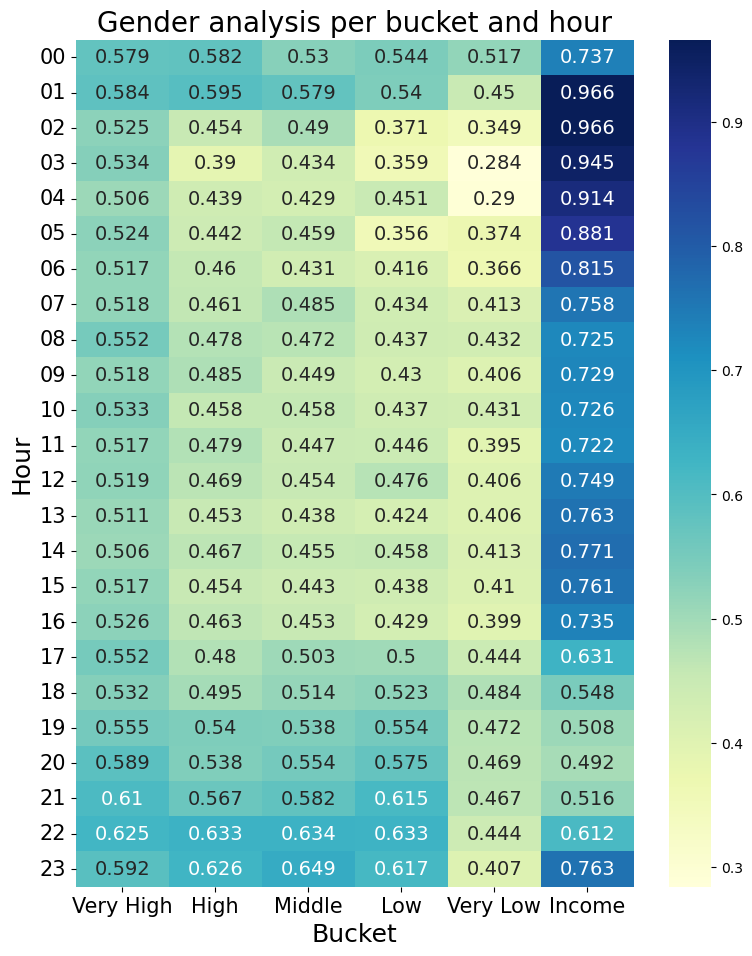

In [251]:
plot_pivot_table(amount_pivot)

### Task 6

In [ ]:
# 1 Измените тип поля tr_day на int
# 2 выберите из transaction все MCC коды, котоыре встертились в выборке более чем 60 000 раз
# 3 Сгрупируйте отфильтрованный датафрейм по дню и МСС-код, получая среднее значение суммы amount
# 4 отрисуйте зависимость средних сумм (метод unstack())по каждому из МСС-кодов по дням

In [263]:
transactions_5_1_a.head(3)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_day,tr_time
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0,10:23:26
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6,07:08:31
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,8,07:06:10


In [264]:
transactions_5_1_a.dtypes

customer_id          int64
tr_datetime         object
mcc_code             int64
tr_type              int64
amount             float64
term_id             object
gender             float64
mcc_description     object
tr_description      object
tr_day              object
tr_time             object
dtype: object

In [277]:
#делаем колонку tr_day числовой
transactions_6 = transactions_5_1_a.copy()
transactions_6['tr_day']= transactions_6['tr_day'].astype(int)
transactions_6.head(3)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_day,tr_time
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0,10:23:26
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6,07:08:31
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,8,07:06:10


In [278]:
transactions_6.dtypes

customer_id          int64
tr_datetime         object
mcc_code             int64
tr_type              int64
amount             float64
term_id             object
gender             float64
mcc_description     object
tr_description      object
tr_day               int64
tr_time             object
dtype: object

In [268]:
# 2 выберите из transaction все MCC коды, котоыре встертились в выборке более чем 60 000 раз

In [280]:
transactions_6_2 = transactions_6.groupby("mcc_code").filter(lambda x: len(x) > 60000)
transactions_6_2.head(3)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_day,tr_time
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0,10:23:26
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6,07:08:31
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,8,07:06:10


In [ ]:
# 3 Сгрупируйте отфильтрованный датафрейм по дню и МСС-код, получая среднее значение суммы amount

In [284]:
res = transactions_6_2.groupby(['tr_day','mcc_description']).amount.mean()
res

tr_day  mcc_description                                               
0       Бакалейные магазины, супермаркеты                                 -15462.567344
        Денежные переводы                                                -214754.866266
        Звонки с использованием телефонов, считывающих магнитную ленту     -5631.316489
        Финансовые институты — снятие наличности автоматически            -55388.115175
        Финансовые институты — снятие наличности вручную                   90390.672987
                                                                              ...      
456     Бакалейные магазины, супермаркеты                                 -15411.548528
        Денежные переводы                                                -274049.766409
        Звонки с использованием телефонов, считывающих магнитную ленту     -5945.182500
        Финансовые институты — снятие наличности автоматически             18406.478780
        Финансовые институты — снятие наличности 

In [ ]:
# 4 отрисуйте зависимость средних сумм (метод unstack())по каждому из МСС-кодов по дням

In [288]:
res = res.unstack()
res

mcc_description                                   tr_day
Бакалейные магазины, супермаркеты                 0         -15462.567344
                                                  1         -17770.243543
                                                  2         -13197.019449
                                                  3         -12584.078209
                                                  4         -12376.649916
                                                                ...      
Финансовые институты — снятие наличности вручную  452        97106.748032
                                                  453       116383.905616
                                                  454       105039.577393
                                                  455       100973.037396
                                                  456       109925.614017
Length: 2285, dtype: float64

In [289]:
res = res.unstack()
res

tr_day,0,1,2,3,4,5,6,7,8,9,...,447,448,449,450,451,452,453,454,455,456
mcc_description,,,,,,,,,,,,,,,,,,,,,
"Бакалейные магазины, супермаркеты",-15462.567344,-17770.243543,-13197.019449,-12584.078209,-12376.649916,-13971.893671,-15385.011725,-17544.912790,-20109.522088,-17375.622409,...,-12854.403760,-13051.923798,-15507.932027,-15458.086173,-11283.625000,-11805.167583,-11932.826972,-13345.274312,-12953.262927,-15411.548528
Денежные переводы,-214754.866266,-158317.573750,-311439.224857,-267813.727273,-351382.308480,-230972.420240,-397063.781333,-179794.581268,-212828.572289,-133806.746885,...,-168212.898059,-415807.322589,-178907.372857,-197508.405115,-142077.821653,-215973.976904,-190370.376239,-177081.530909,-243267.887869,-274049.766409
"Звонки с использованием телефонов, считывающих магнитную ленту",-5631.316489,-6375.587685,-4280.502021,-5683.344844,-7071.730388,-6893.030213,-4935.739569,-4719.982607,-4280.463812,-4379.382967,...,-4988.620270,-4884.483127,-5034.321422,-5449.122196,-4885.985017,-5084.165513,-5684.247016,-4786.101095,-5007.255934,-5945.182500
Финансовые институты — снятие наличности автоматически,-55388.115175,-38938.920557,-71297.553542,-49753.475536,-54339.135414,-97282.077356,-66022.836788,-47735.545047,-98093.910351,-51888.192982,...,-62286.615568,-69156.010483,-45427.455294,-21210.572431,-35274.021944,-57168.723509,-63716.595522,-28649.792782,-16193.186198,18406.478780
Финансовые институты — снятие наличности вручную,90390.672987,57658.709639,95514.734275,104576.823744,110324.802287,86303.455540,57054.055480,74619.473672,175710.771780,106832.721786,...,72080.817427,129952.422082,53849.208352,68670.530731,62357.686708,97106.748032,116383.905616,105039.577393,100973.037396,109925.614017


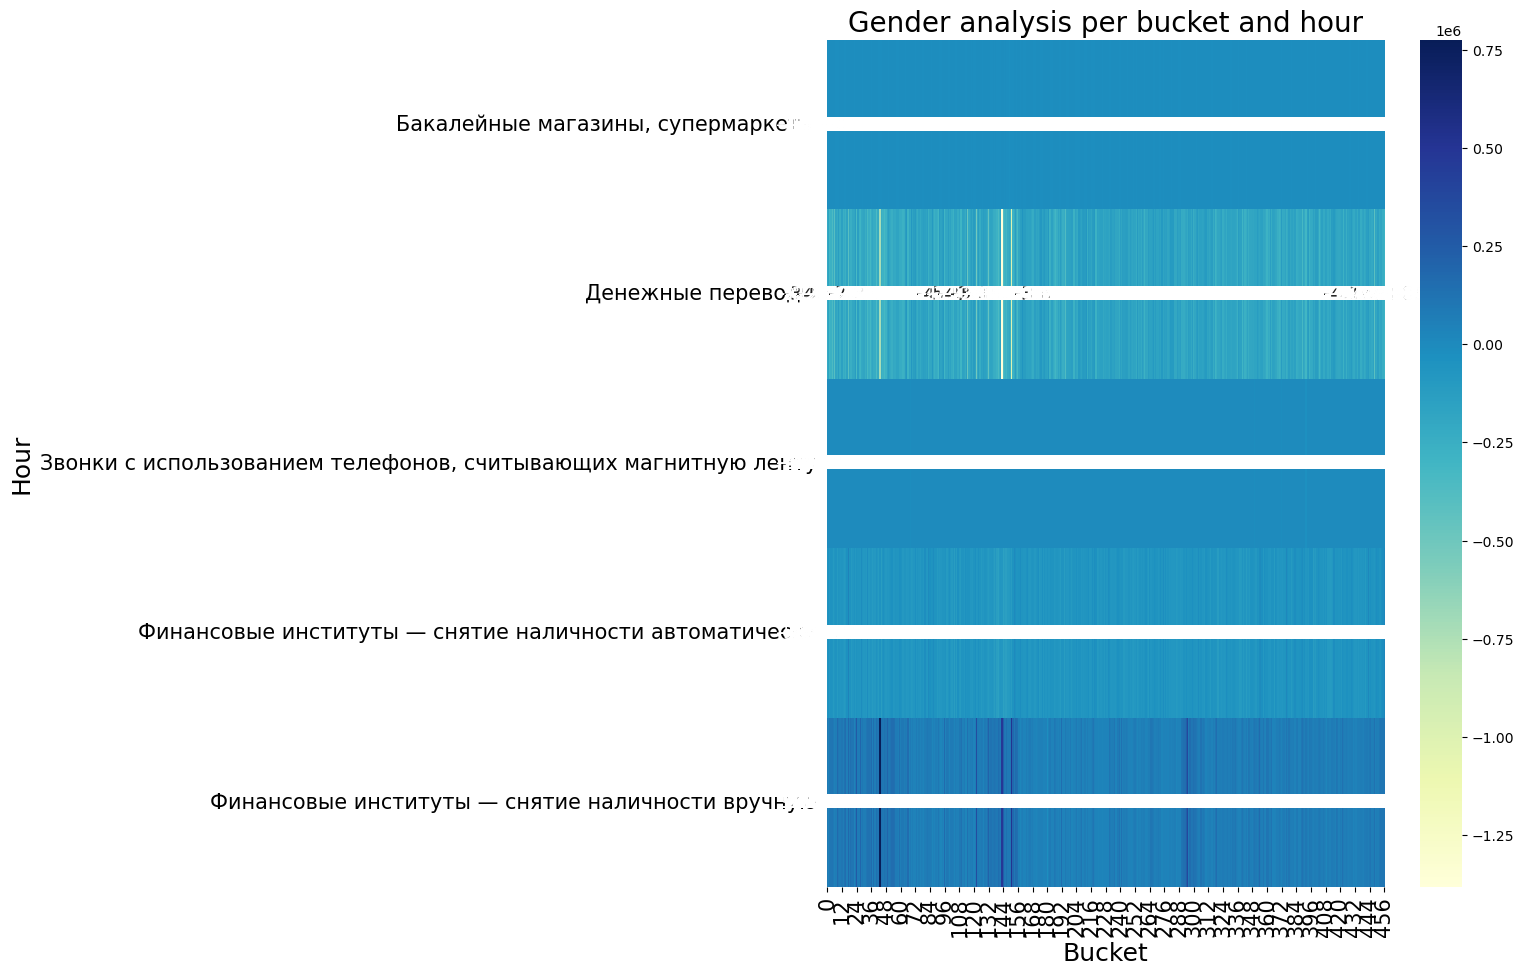

In [290]:
plot_pivot_table(res)